# Decision Tree Model

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz     # This is used to plot the decision tree
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv('datasets/heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Load the dataset
df = pd.read_csv('datasets/heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Show the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [5]:
# Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# ML for train and test
# Create logistic regression model
y = df.target.values
x_data = df.drop(['target'], axis=1)


In [7]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.33, random_state=40)

In [8]:
# show the shape of the training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(686, 13)
(339, 13)
(686,)
(339,)


In [9]:
# check the datatype
x_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [10]:
# check the x_train header
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
945,56,1,3,120,193,0,0,162,0,1.9,1,0,3
307,44,1,1,120,220,0,1,170,0,0.0,2,0,2
740,44,1,2,140,235,0,0,180,0,0.0,2,0,2
787,51,1,0,140,298,0,1,122,1,4.2,1,3,3
863,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [11]:
# Decision Tree Classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [12]:
# Predict the class label for the test set using the decision tree classifier
y_pred = clf_gini.predict(x_test)
print(y_pred)
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))



[0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1
 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1
 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1
 1 1 1 0 1 0]
Model accuracy score with criterion gini index: 0.8260


In [13]:
# Predict the class label for the train set using the decision tree classifier
y_pred_train = clf_gini.predict(x_train)
print(y_pred_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

[0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1
 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 0 1 0 1 0 1 0 1 0 1 1 

In [14]:
# Print the training and testing set accuracy score
print('Training set accuracy score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
print('Test set accuracy score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set accuracy score: 0.8455
Test set accuracy score: 0.8260


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.5\nsamples = 686\nvalue = [335, 351]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.376\nsamples = 331\nvalue = [248, 83]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.499\nsamples = 137\nvalue = [66, 71]'),
 Text(0.0625, 0.125, 'gini = 0.387\nsamples = 84\nvalue = [22, 62]'),
 Text(0.1875, 0.125, 'gini = 0.282\nsamples = 53\nvalue = [44, 9]'),
 Text(0.375, 0.375, 'x[9] <= 0.45\ngini = 0.116\nsamples = 194\nvalue = [182, 12]'),
 Text(0.3125, 0.125, 'gini = 0.34\nsamples = 46\nvalue = [36, 10]'),
 Text(0.4375, 0.125, 'gini = 0.027\nsamples = 148\nvalue = [146, 2]'),
 Text(0.75, 0.625, 'x[9] <= 1.7\ngini = 0.37\nsamples = 355\nvalue = [87, 268]'),
 Text(0.625, 0.375, 'x[0] <= 55.5\ngini = 0.296\nsamples = 310\nvalue = [56, 254]'),
 Text(0.5625, 0.125, 'gini = 0.149\nsamples = 185\nvalue = [15, 170]'),
 Text(0.6875, 0.125, 'gini = 0.441\nsamples = 125\nvalue = [41, 84]'),
 Text(0.875, 0.375, 'x[10] <= 0.5\ngini = 0.429\nsamples = 45\nvalue = [31, 1

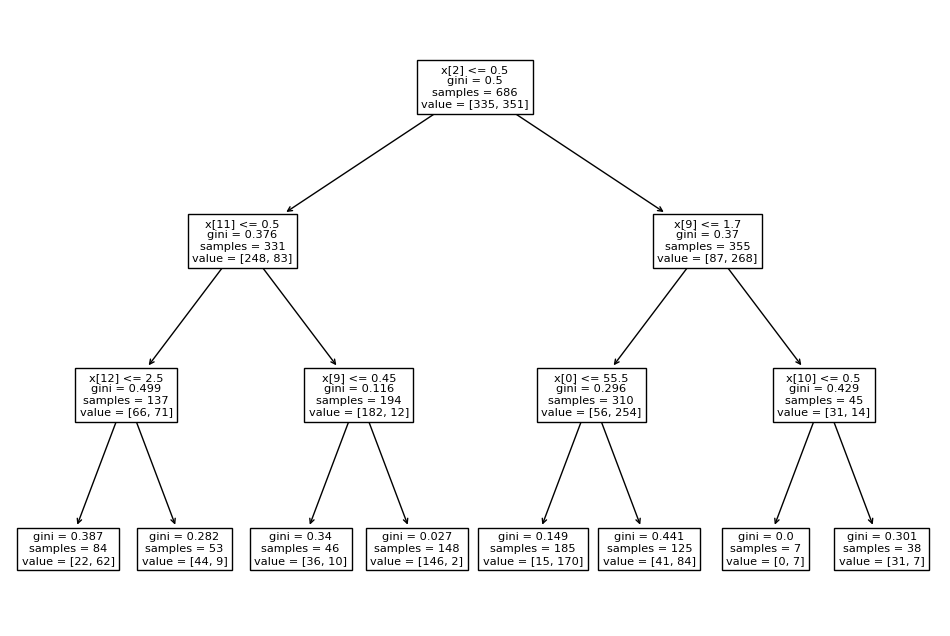

In [15]:
# Visualize decision-tree leaf nodes (1st way - create figure for width and height)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini.fit(x_train, y_train))

In [16]:
# Visualization of decision tree

# Load the dataset
heart_df = pd.read_csv('datasets/heart_disease.csv')
y = heart_df.target.values
x = heart_df.drop(['target'], axis=1)

# Train the decision tree classifiers
model = tree.DecisionTreeClassifier()
model.fit(x, y)

# Get the class name from the dataset
class_name = heart_df.target.unique().astype(str)

# Generate the graphviz representation of the decision tree
dot_data = tree.export_graphviz(model, out_file='heart_disease.dot', feature_names=x.columns, class_names=class_name,
                                filled=True, rounded=True, special_characters=True)

In [17]:
# Visualize decision-trees
dot_data = tree.export_graphviz(clf_gini, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('heart_disease')

'heart_disease.pdf'